In [4]:
import numpy as np
from dataset.timeseriesToyDataset.twoLinearDataset import twoLinearDataset
from evaluator.visualize import lineplot
from dataset.timeseriesToyDataset.twoLinearDataset import LinearParameter
from dataset.timeseriesToyDataset.twoLinearDatasetWithShifts import twoLinearDatasetWithShifts
from dataset.timeseriesToyDataset.sample_dataset_specification import add_shifts_to_linear_params

from anomalyDetector.DRE.MLBasedDRE import MLBasedDRE, MLBasedDRE_Parameter
from models.MLP_torch import MLP_Parameter
from models.modelFactory import ModelFactory

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

MLP_Parameter


/home/work/.cache/pypoetry/virtualenvs/godaddy-3UyvmeC2-py3.9/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
ToyDatasetProblem = [
    (LinearParameter(0, 5, 0.1, 10000), LinearParameter(0, 14, 0.1, 2000)),
    (LinearParameter(0.0005, 2, 0.1, 10000), LinearParameter(0.0005, 10, 0.1, 2000)),
    (LinearParameter(0.001, 2, 0.1, 10000), LinearParameter(0.001, 4, 0.1, 2000)),
    (LinearParameter(0, 3, 0.1, 10000), LinearParameter(0.001, 3, 0.1, 2000)),
    (LinearParameter(0.001, 2, 0.1, 10000), LinearParameter(0, 12, 0.1, 2000)),
    (LinearParameter(0.0001, 2, 0.1, 10000), LinearParameter(0.001, 3, 0.1, 2000)),
    (LinearParameter(0.001, 3, 0.1, 10000), LinearParameter(-0.001, 13, 0.1, 2000)),
    (LinearParameter(0, 8, 0.1, 10000), LinearParameter(0, 8, 0.1, 2000)),
    (LinearParameter(0.0005, 3, 0.1, 10000), LinearParameter(0.0005, 8, 0.1, 2000)),
]
p = ToyDatasetProblem[0]

In [6]:
dataset = twoLinearDataset(p)

<Axes: xlabel='idx', ylabel='x'>

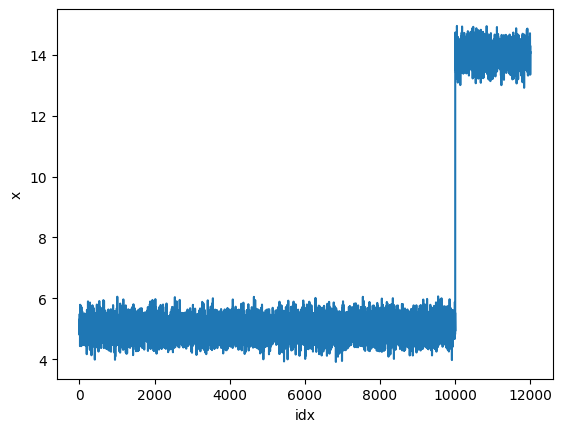

In [12]:
sns.lineplot(dataset.data, x="idx", y="x")

In [13]:
import torch.nn as nn

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=50, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq), 1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]
